# 모델링 사용 설명서 2탄 - Decision Tree

## 1. 분류의 개요

### 1) 분류란?
- 분류: 지도학습의 대표적인 유형


- 지도학습은 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방법


- 분류에서는 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤 새롭게 관측된 데이터에 대한 레이블 판별

#### [ 분류의 머신러닝 알고리즘 ]
- 나이브 베이즈: 베이즈 통계와 생성 모델
- 로지스틱 회귀: 독립변수와 종속변수의 선형 관계성
- 결정 트리: 데이터 균일도에 따른 규칙
- 서포트 벡터 머신: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- 최소 근접: 근접 거리 기준
- 신경망: 심층 연결
- 앙상블: 서로 다른 또는 같은 머신러닝 알고리즘 결합

## 2. 결정 트리

### 1) 결정 트리란?
- 결정 트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것


- 규칙 노드(Decision Node): 규칙 조건
- 리프 노드(Leaf Node): 결정된 클래스 값
- 서브 트리(Sub Tree): 새로운 규칙 조건
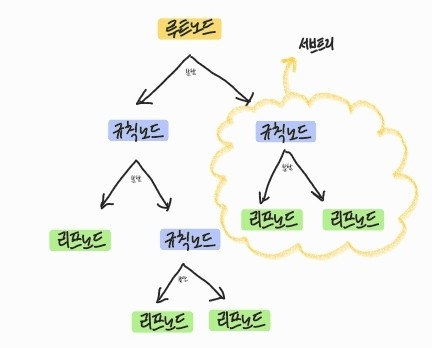

#### [ 결정 노드 ]
- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있는 규칙 조건을 만듬


- 정보 균일도가 데이터 세트로 분할될 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 분할하는 방식을 반복하여 데이터 값을 예측

#### [ 정보의 균일도를 측정하는 방법 ]
- 정보 이득 -> '(1 - 엔트로피 지수)'로 정보 이득이 높은 속성을 기준으로 분할
    - 엔트로피 지수: 데이터 집합의 혼잡도
    
    
- 지니 계수 -> 지니 계수가 낮은 속성을 기준으로 분할
    - 지니 계수: 경제학에서 불평등 지수를 나타낼 때 사용하는 계수

### 2) 결정 트리 모델의 특징

#### [ 결정 트리의 장점 ]
- 가장 큰 장점은 알고리즘이 쉽고 직관적이라는 점


- '균일도'라는 룰이 매우 명확하여 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없음


#### [ 결정 트리의 단점 ]
- 가장 큰 단점은 과적합으로 정확도가 떨어질 수 있다는 점


- 복잡한 학습 모델은 새로운 데이터 세트가 들어왔을 때 예측 성능이 떨어질 수밖에 없음

### 3) 결정 트리 파라미터
- 결정 트리 알고리즘은 사이킷런의 DecisionTreeClassifier(분류를 위한 클래스)dhk DecisionTreeRegressor(회귀를 위한 클래스)로 구현 가능


    - min_samples_split: 자식 노드를 분할하기 위한 최소한의 샘플 데이터 수, 디폴트 값은 2
    - min_samples_leaf: 말단 노드에 있어야 할 최소한의 샘플 데이터 수, 디폴트 값은 1
    - max_features: 각 노드에서 분할에 사용할 변수의 최대 수
    - max_depth: 트리의 최대 깊이, 디폴트 값은 None
    - max_leaf_nodes: 잎 노드의 최대 개수, 디폴트 값은 None

### 4) 결정 트리 모델의 시각화

#### [ 데이터 불러오기 ]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

In [2]:
wisc = pd.read_csv('./data/wisc_bc_data.csv')
wisc.shape

(569, 33)

#### [ 데이터 변수 ]

In [3]:
wisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
wisc = wisc.drop(['Unnamed: 32'], axis=1)
wisc.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


#### [ 데이터 시각화 ]

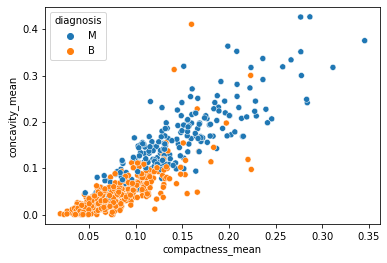

In [5]:
sns.scatterplot(data=wisc, x='compactness_mean', y='concavity_mean', hue='diagnosis')
plt.show()

#### [ 의사결정나무를 만드는 과정 ]

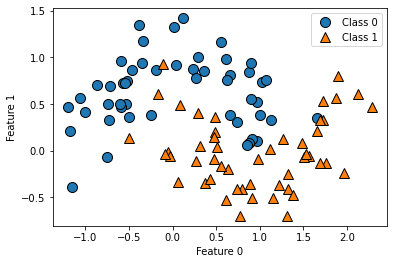

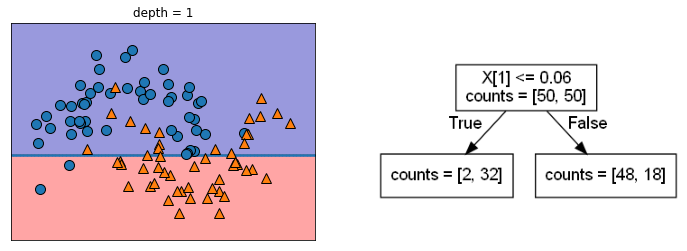

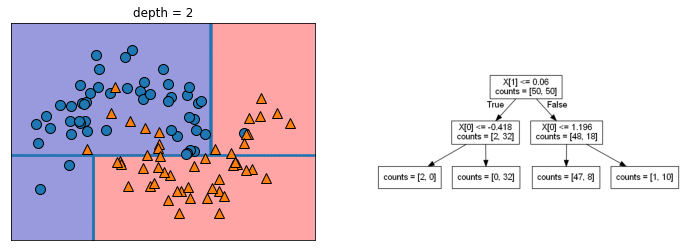

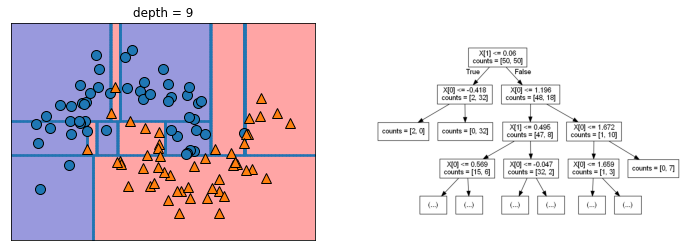

In [6]:
mglearn.plots.plot_tree_progressive()

In [30]:
# 사이킷런 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
tree = DecisionTreeClassifier(random_state=0)  # random_state: 난수 seed 설정

# 학습과 테스트 데이터 세트로 분리
X = wisc.iloc[:, 2:]  # 세포 변수들
y = wisc.iloc[:, 1]   # diagnosis 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# DecisionTree Classifier 학습
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.doc 파일 생성
export_graphviz(tree, out_file='./data/tree.dot', class_names=['악성', '양성'], feature_names=wisc.columns[2:], impurity=False, filled=True)

In [32]:
import pydotplus

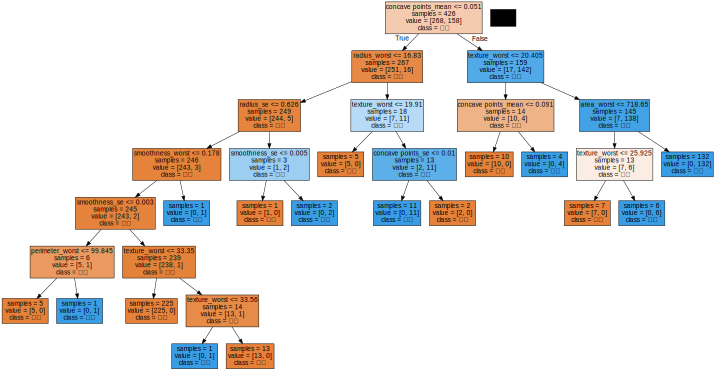

In [33]:
with open('./data/tree.dot', 'rt', encoding='utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 그래프 사이즈 조정 코드
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('./data/resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### 5) 파라미터 변경

#### [ max_depth ]

In [34]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

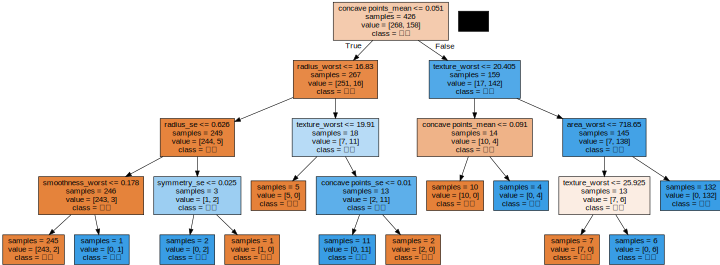

In [35]:
export_graphviz(tree, out_file='./data/tree.dot', class_names=['악성', '양성'], feature_names=wisc.columns[2:], impurity=False, filled=True)
with open('./data/tree.dot', 'rt', encoding='utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 그래프 사이즈 조정 코드
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('./data/resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

#### [ min_samples_split ]

In [36]:
tree = DecisionTreeClassifier(min_samples_split=20, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=0)

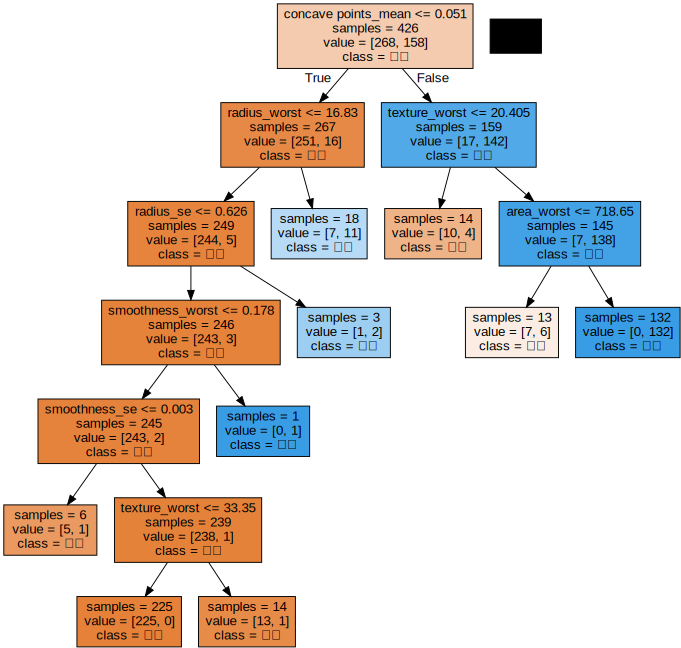

In [37]:
export_graphviz(tree, out_file='./data/tree.dot', class_names=['악성', '양성'], feature_names=wisc.columns[2:], impurity=False, filled=True)
with open('./data/tree.dot', 'rt', encoding='utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 그래프 사이즈 조정 코드
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('./data/resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

#### [ min_samles_leaf ]

In [38]:
tree = DecisionTreeClassifier(min_samples_leaf=12, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=12, random_state=0)

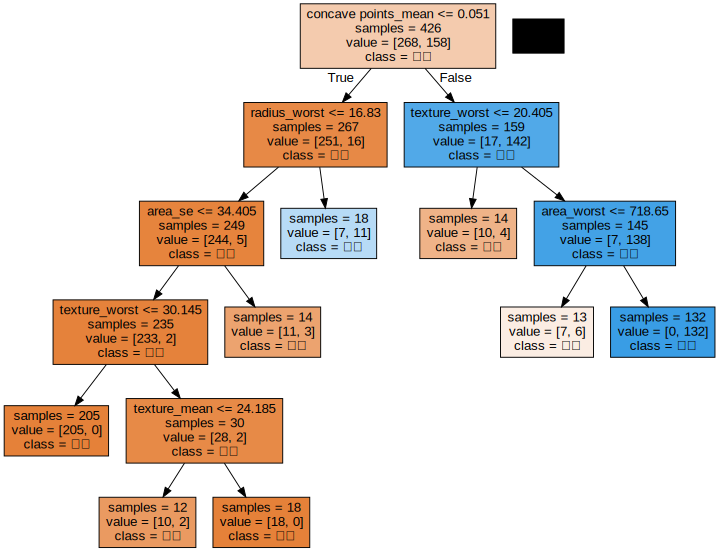

In [41]:
export_graphviz(tree, out_file='./data/tree.dot', class_names=['악성', '양성'], feature_names=wisc.columns[2:], impurity=False, filled=True)
with open('./data/tree.dot', 'rt', encoding='utf8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 그래프 사이즈 조정 코드
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('./data/resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### 6) 결정 트리 과적합 (Overfitting)

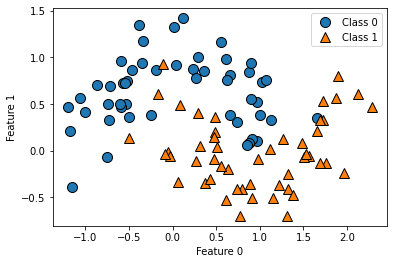

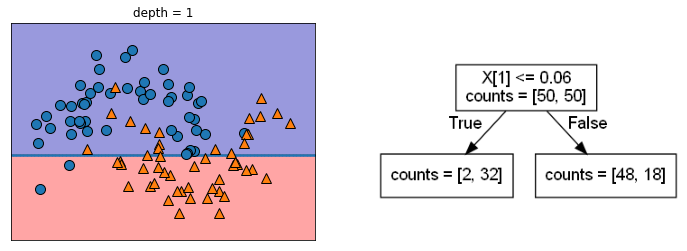

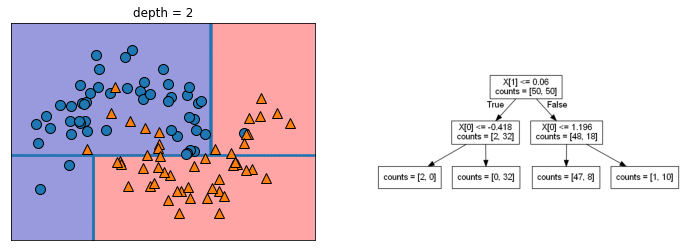

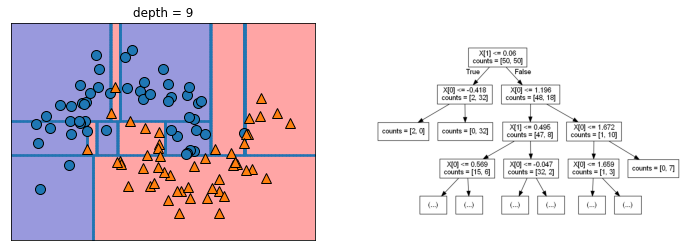

In [42]:
mglearn.plots.plot_tree_progressive()

### 7) 모델의 정확도 측정

In [43]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=12, random_state=0)
tree.fit(X_train, y_train)

print('학습용 데이터 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('시험용 데이터 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.948
시험용 데이터 정확도: 0.930
